In [1]:
import numpy as np 
import pandas as pd

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, roc_curve, roc_auc_score

X = diabetes_df.drop(["Outcome"], axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((537, 8), (537,), (231, 8), (231,))

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r_squard = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(r_squard)
print("mse: " + str(mse) + "\nrmse: " + str(rmse))

0.3046721986545401
mse: 0.16006834039331402
rmse: 0.4000854163716968


In [12]:
alphas = [0.0001, 0.1, 1, 10, 100]
scores = []
for alpha in alphas:
    reg = Ridge(alpha = alpha)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)
print(scores)

[0.3046721717759914, 0.30464535716466046, 0.30440708054714505, 0.3023133696328062, 0.29359436413074225]


In [14]:
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred_prob = reg.predict_proba(X_test)[:, 1]

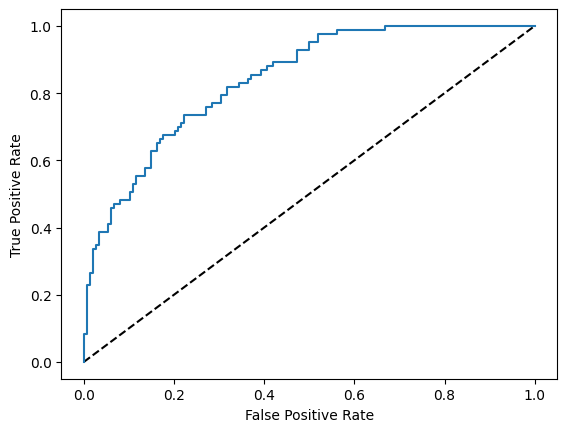

In [15]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [ ]:
auc = roc_auc_score(y_test, y_pred_prob)
print(auc) #niceee, pretty high i think 

0.8411755128622598
